Linear SVM Performance:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        40
           1       0.89      0.97      0.93        35

    accuracy                           0.93        75
   macro avg       0.93      0.94      0.93        75
weighted avg       0.94      0.93      0.93        75

RBF SVM Performance:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        40
           1       0.92      0.94      0.93        35

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



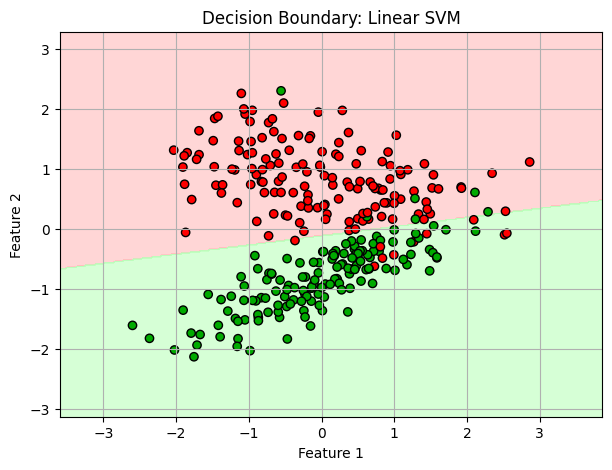

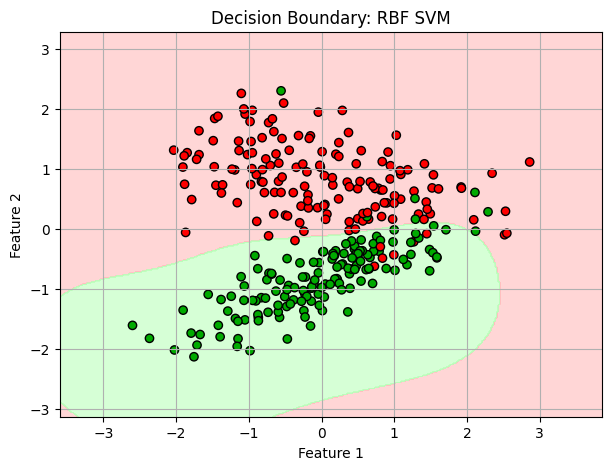

Best Parameters (RBF SVM): {'C': 10, 'gamma': 1}
Cross-Validation Accuracy (RBF SVM): 0.943


In [1]:
# Task 7: Support Vector Machines - Linear and RBF

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap

# 1. Load a 2D binary classification dataset
X, y = datasets.make_classification(n_samples=300, n_features=2, n_redundant=0,
                                    n_informative=2, n_clusters_per_class=1, random_state=10)

# 2. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# 4. Linear SVM
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

print("Linear SVM Performance:\n", classification_report(y_test, y_pred_linear))

# 5. Non-linear SVM with RBF kernel
rbf_svm = SVC(kernel='rbf', C=1, gamma=0.5)
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

print("RBF SVM Performance:\n", classification_report(y_test, y_pred_rbf))

# 6. Function to visualize decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB'])
    cmap_bold = ListedColormap(['#FF0000', '#00AA00'])

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# 7. Visualize both models
plot_decision_boundary(linear_svm, X_scaled, y, "Decision Boundary: Linear SVM")
plot_decision_boundary(rbf_svm, X_scaled, y, "Decision Boundary: RBF SVM")

# 8. Hyperparameter tuning with Grid Search (RBF)
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_scaled, y)
print("Best Parameters (RBF SVM):", grid_search.best_params_)

# 9. Cross-validation score
final_model = grid_search.best_estimator_
cv_score = cross_val_score(final_model, X_scaled, y, cv=5)
print("Cross-Validation Accuracy (RBF SVM):", np.round(cv_score.mean(), 3))
